In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud

In [86]:
plt.rc('font', family='Malgun Gothic')

In [5]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력 default:20
pd.set_option('display.max_rows', 10) #None으로 설정하면 모든 행 출력 default: 50

# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) #None으로 설정하면 모든 내용을 출력 default:60

In [6]:
# 정규화
import re

In [7]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-06 10:34:49.546103


'2025-01-06'

In [9]:
df = pd.read_csv(f'../stock/news_preprocessed_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_갯수,내용_토큰_갯수,내용_명사,제목_명사
0,매일경제,"‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류","\n 신정환 카카오 전 CTO도 합류AI 기업 발굴·투자사 지원 강화 사진 확대 신정환 카카오 전 부사장(좌), 안상일 하이퍼커넥트 전 대표(우)가 알토스벤처스의 벤처파트너로 합류했다. 미국의 한국계 벤처캐피탈 알토스벤처스가 하이퍼커넥트 공동창업자인 안상일 전 대표를 벤처파트너로 영입했다고 6일 밝혔다. 카카오 전 기술최고책임자(CTO)를 역임한 신정환 전 부사장도 함께 합류했다.알토스벤처스는 두 벤처파트너와 함께 포트폴리오 기업 지원 역량을 강화하고, 인공지능(AI)과 첨단 기술 분야 유망 초기 기업 발굴에 박차를 가할 계획이다.신정환 파트너는 서울대 건축학과를 졸업한 후 NHN에서 소프트웨어 엔지니어로 경력을 시작했다. 이후 NHN 재팬 팀장과 NHN 비즈니스 플랫폼 부장을 거쳐 카카오 CTO를 맡았다. 신 파트너는 카카오 재직 기간 동안 카카오톡, 카카오스토리와 같은 주요 서비스 개선과 수익화를 성공적으로 수행했다.안상일 파트너는 서울대 재료공학부를 졸업한 후 연쇄창업가로서 6개의 스타트업을 창업했다. 2014년 하이퍼커넥트를 공동 창업해 글로벌 영상 채팅 플랫폼 아자르와 라이브 스트리밍 서비스 하쿠나라이브를 개발했다. 서비스를 전 세계 230개국에 확장하며 하이퍼커넥트를 세계적인 기업으로 성장시켰다.이후 안 파트너는 2021년 하이퍼커넥트를 미국 나스닥 상장사인 매치그룹에 2조원에 매각한 후 매치그룹 아시아태평양 최고혁신책임자(CIO)를 역임했다.신 파트너는 지난해 9월, 안 파트너는 같은 해 11월 알토스벤처스에 합류했다. 두 파트너는 포트폴리오 기업 기술·제품 개발과 운영 효율성 성장 전략 수립을 도울 예정이다.한편 알토스벤처스는 1996년 미국 실리콘밸리를 기반으로 설립된 벤처캐피털로, 2006년 한국 투자를 본격화했다. 크래프톤, 우아한형제들(배달의민족), 하이퍼커넥트, 비바리퍼블리카(토스), 당근마켓 등에 투자했다.\n",2025-01-06 09:44:38,31,938,8,188,신정환 카카오 전 도 합류 기업 발굴 투자 사 지원 강화 사진 확대 신정환 카카오 전 부사 좌 안상 일 하이퍼 커넥트 전 대표 알토 스벤 처스 처 파트너 합류 미국 한국 벤처캐피탈 알토 스벤 처스 하이퍼 커넥트 창업 안상 일 전 대표 처 파트너 입 카카오 전 기술 최고 책임자 를 역임 신정환 전 부사 장도 합류 알토 스벤 처스 두 처 파트너 포트폴리오 기업 지원 역량 인공 지능 과 첨단 기술 분야 유망 초기 기업 발굴 박차 계획 신정환 파트너 서울대 건축학 졸업 후 소프트웨어 엔지니어 경력 시작 이후 재팬 팀 비즈니스 플랫폼 부장 카카오 를 신 파트너 카카오 재직 기간 동안 카카오 톡 카카오스토리 주요 서비스 개선 수익 성공 수행 안상 일 파트너 서울대 재료공학 졸업 후 연쇄 창업가 로서 개 스타트업 창업 하이퍼 커넥트 공동 창업 글로벌 영상 채팅 플랫폼 아자르 라이브 스트리밍 서비스 쿠나 라이브 개발 서비스 전 세계 개국 확장 하이퍼 커넥트 세계 기업 성장 이후 안 파트너 하이퍼 커넥트 미국 나스닥 상장 사인 매치 그룹 매각 후 매치 그룹 아시아 태평양 최고 혁신 책임자 를 역임 신 파트너 지난해 안 파트너 해 알토 스벤 처스 합류 두 파트너 포트폴리오 기업 기술 제품 개발 운영 효율 성장 전략 수립 도울 예정 한편 알토 스벤 처스 미국 실리콘밸리 기반 설립 벤처캐피털 한국 투자 본격 크래프톤 형제 배달 민족 하이퍼 커넥트 비바 리퍼 블 리카 토스 당근 마켓 등 투자,아자르 신화 안상일 벤처 투자자 토스 합류


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_갯수  100 non-null    int64 
 7   내용_토큰_갯수  100 non-null    int64 
 8   내용_명사     100 non-null    object
 9   제목_명사     100 non-null    object
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


In [10]:
df['제목']

0                 ‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류
1            메리츠증권, 美국채 실시간 거래 ‘미국채권 LIVE’ 서비스 시행
2          “삼성에스디에스, 이익률 개선 지연·성장 전략 구체화 기대”…목표가↓
3                    “파마리서치, 리쥬란은 불경기도 피해간다”…목표가↑
4     “한국선 콧대 높은 애플, 중국선 할인한다고?”…충격받은 주가 연초부터 뚝 뚝
                         ...                     
95                         "엔비디아 큰 거 온다"…하이닉스 기지개
96                   삼성SDS 주가 하락에…상장 앞둔 LG CNS 고심
97                    '전고체 배터리' ETF 올해 첫 출격…7일 상장
98             한국 증시, 드디어 '앞에서 1등'…외국인들 쓸어 담은 종목이
99                 주식 거래수수료 전면 무료…메리츠證 예탁자산 3조 돌파
Name: 제목, Length: 100, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [25]:
cvect = CountVectorizer()
cvect_dtm = cvect.fit_transform(df['제목_명사'])
cvect_dtm

<100x409 sparse matrix of type '<class 'numpy.int64'>'
	with 613 stored elements in Compressed Sparse Row format>

In [32]:
tvect = TfidfVectorizer()
tvect_dtm = tvect.fit_transform(df['제목_명사'])
tvect_dtm

<100x409 sparse matrix of type '<class 'numpy.float64'>'
	with 613 stored elements in Compressed Sparse Row format>

In [33]:
cvect_dtm.toarray(), tvect_dtm.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
tvect.get_feature_names_out()

In [31]:
cvect.get_feature_names_out()

array(['主食', '가치', '강남', '강보합', '강세', '강조', '개미', '개발', '개선', '개설', '개인',
       '개최', '거래', '거래소', '걸림돌', '겨울', '결국', '경신', '경우', '경쟁력', '계감',
       '계엄', '고갈', '고수', '고심', '고체', '공매도', '공시', '공장', '과정', '관련', '광주',
       '교수', '교육', '구체', '국내', '국민', '국채', '국토', '군살', '규모', '글로벌', '금리',
       '금융', '급등', '급락', '급발진', '급부상', '기대', '기대감', '기술', '기업', '기지개',
       '기초', '김영성', '김원규', '김현석', '나우', '내부', '너스', '노출', '논의', '눈높이',
       '눈물', '뉴욕', '닉스', '다음', '달러', '달째', '담당', '당국', '대상', '대세', '대신',
       '대우', '대체', '대표', '대학', '도규', '돌입', '돌파', '동반', '두산', '드래곤', '디셈버',
       '라운드', '랠리', '로봇', '로스', '로어링', '리서치', '리쥬', '릭스', '마녀', '마이너스',
       '마이크', '마지막', '마켓', '매각', '매수', '매입', '메리', '메자닌', '명회', '모건',
       '모델', '모빌', '모색', '모집', '목전', '목표', '몸값', '무더기', '무료', '뭉칫돈', '미국',
       '바람', '반도체', '발표', '방한', '배분', '배터리', '밸류', '벤처', '변동', '변동성',
       '보유', '본격', '부동산', '부위원장', '부자', '부족', '부진', '분기', '불경기', '불기둥',
       '붕괴', '뷰티', '브랜드', '브로드컴', '브리핑', '비디아', '비트코인', '사랑

In [34]:
df_cvect_dtm = pd.DataFrame(cvect_dtm.toarray(), columns = cvect.get_feature_names_out())
df_tvect_dtm = pd.DataFrame(tvect_dtm.toarray(), columns = tvect.get_feature_names_out())

In [37]:
df_cvect_dtm.shape, df_tvect_dtm.shape

((100, 409), (100, 409))

In [38]:
df_cvect_dtm.sum()

主食     2
가치     1
강남     1
강보합    1
강세     2
      ..
환율     1
환호     1
회복     3
회의록    1
훈풍     1
Length: 409, dtype: int64

<Axes: title={'center': 'BOW'}>

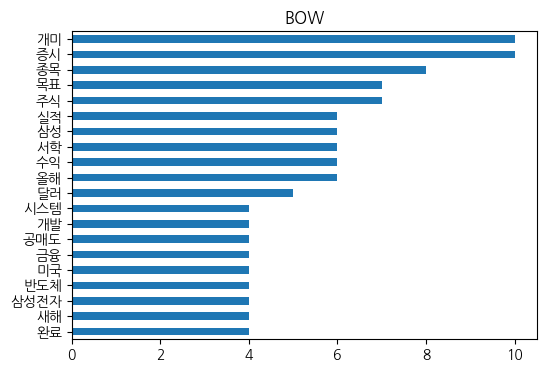

In [52]:
df_cvect_dtm.sum().nlargest(20).sort_values(ascending=True).plot.barh(title='BOW', figsize=(6,4))

<Axes: title={'center': 'TF-IDF 가중치 합'}>

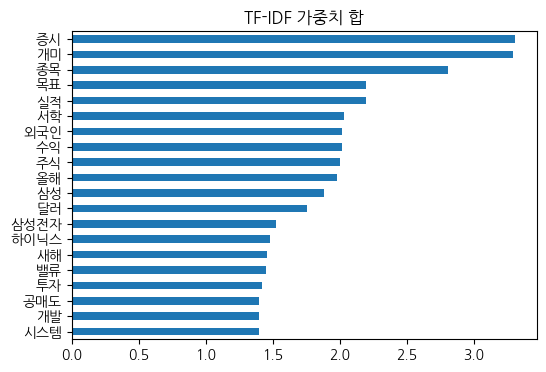

In [51]:
df_tvect_dtm.sum().nlargest(20).sort_values(ascending=True).plot.barh(title='TF-IDF 가중치 합', figsize=(6,4))

In [53]:
def display_word_cloud(dict, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','한국','증시']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate_from_frequencies(dict)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

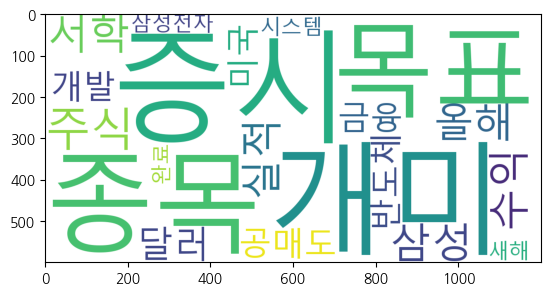

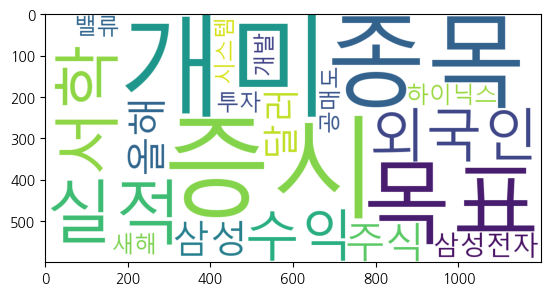

In [55]:
display_word_cloud(df_cvect_dtm.sum().nlargest(20).to_dict())
display_word_cloud(df_tvect_dtm.sum().nlargest(20).to_dict())

#### LDA(LatentDirichletAllocation) 토픽모델링

- W : 문서-주제 행렬 (100,4)
- H : 주제-단어 행렬 (4,409)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [56]:
from sklearn.decomposition import LatentDirichletAllocation

In [96]:
# m_components : 주제수
# 문서 X 주제
n_components = 5
LDA_model = LatentDirichletAllocation(n_components=n_components, random_state=2025)
cvect_W = LDA_model.fit_transform(df_cvect_dtm)
print(cvect_W.shape)
cvect_W

(100, 5)


array([[0.02500323, 0.89992201, 0.02506592, 0.025004  , 0.02500483],
       [0.91956685, 0.02008497, 0.02023509, 0.02010882, 0.02000427],
       [0.01824749, 0.01822853, 0.01848557, 0.0183611 , 0.92667732],
       [0.03337012, 0.03334095, 0.86656001, 0.0333402 , 0.03338872],
       [0.02248891, 0.02234089, 0.91071495, 0.02222711, 0.02222813],
       [0.04000491, 0.04000675, 0.04017633, 0.04000608, 0.83980593],
       [0.03451307, 0.03333853, 0.0355216 , 0.86328782, 0.03333898],
       [0.8383455 , 0.04088121, 0.04032991, 0.04000617, 0.04043721],
       [0.02222564, 0.02222692, 0.91096975, 0.02222646, 0.02235123],
       [0.83939212, 0.04025434, 0.0403371 , 0.04000745, 0.040009  ],
       [0.04000534, 0.83914665, 0.04018708, 0.04000662, 0.04065431],
       [0.06789439, 0.06668675, 0.73204558, 0.06668476, 0.06668852],
       [0.86665917, 0.03333539, 0.03333469, 0.03333519, 0.03333557],
       [0.02222508, 0.91109784, 0.02222481, 0.02222577, 0.0222265 ],
       [0.02918599, 0.88459154, 0.

In [72]:
# 문서의 주제확률값의 합은 1
cvect_W.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
# 주제 X 단어
cvect_H = LDA_model.components_
print(cvect_H.shape)
cvect_H

(4, 409)


array([[2.24989612, 0.25003785, 0.2500287 , ..., 1.25198076, 0.25004691,
        1.24976845],
       [0.25003815, 0.25004571, 1.24991359, ..., 0.25018782, 0.25005686,
        0.25008629],
       [0.25003174, 0.25003636, 0.25002756, ..., 1.24515492, 0.25004447,
        0.25006864],
       [0.25003398, 1.24988008, 0.25003015, ..., 1.2526765 , 1.24985177,
        0.25007662]])

In [68]:
# 문서 X 주제 데이터프레임
df_cvect_W = pd.DataFrame(cvect_W)
df_cvect_W['제목'] = df['제목']
df_cvect_W['제목_명사'] = df['제목_명사']
df_cvect_W

,0,1,2,3,제목,제목_명사
0,0.031279,0.905936,0.031505,0.031280,"‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류",아자르 신화 안상일 벤처 투자자 토스 합류
1,0.923833,0.025233,0.025679,0.025255,"메리츠증권, 美국채 실시간 거래 ‘미국채권 LIVE’ 서비스 시행",메리 증권 美 국채 실시간 거래 미국 채권 서비스 시행
2,0.022840,0.022927,0.931155,0.023077,"“삼성에스디에스, 이익률 개선 지연·성장 전략 구체화 기대”…목표가↓",삼성 에스 이익 개선 지연 성장 전략 구체 기대 목표
3,0.041910,0.041716,0.874665,0.041710,"“파마리서치, 리쥬란은 불경기도 피해간다”…목표가↑",파마 리서치 리쥬 불경기 목표
4,0.028162,0.915758,0.028277,0.027803,"“한국선 콧대 높은 애플, 중국선 할인한다고?”…충격받은 주가 연초부터 뚝 뚝",한국선 콧대 애플 중국 선 할인 충격 주가 연초
...,...,...,...,...,...,...
95,0.063177,0.062558,0.810109,0.064155,"""엔비디아 큰 거 온다""…하이닉스 기지개",비디아 거 하이닉스 기지개
96,0.041852,0.043901,0.872171,0.042076,삼성SDS 주가 하락에…상장 앞둔 LG CNS 고심,삼성 주가 하락 상장 고심
97,0.041703,0.042207,0.874012,0.042077,'전고체 배터리' ETF 올해 첫 출격…7일 상장,고체 배터리 올해 출격 일 상장
98,0.051279,0.050125,0.051395,0.847200,"한국 증시, 드디어 '앞에서 1등'…외국인들 쓸어 담은 종목이",한국 증시 앞 등 외국인 종목


In [73]:
# 1번 주제 확률이 높은 상위 5개 문서 보기
df_cvect_W.sort_values(by=1, ascending=False).head(5)

,0,1,2,3,제목,제목_명사
16,0.019246,0.942069,0.019439,0.019246,30억 이상 자산가 담당 삼성증권 임원의 조언···“변동성 장세 버티고 수익내는 힘은 결국 자산배분”,억 이상 자산가 담당 삼성증권 임원 조언 변동성 장세 수익 힘 결국 자산 배분
88,0.022747,0.931600,0.022905,0.022748,준비금 $3조 밑 추락…유동성 고갈→주가 위협 진실은? [김현석의 월스트리트나우],준비금 조 밑 추락 유동 고갈 주가 위협 진실 김현석 월스트리트 나우
23,0.022748,0.930639,0.023417,0.023196,"LS 美자회사 에식스솔루션즈, 2억달러 규모 프리 IPO 성공 ···연내 상장 추진",美 자회사 에식스 솔루션 즈 억 달러 규모 프리 성공 연내 상장 추진
45,0.025222,0.923255,0.026089,0.025435,서정학 IBK투자證 대표 “올해 금융환경 더욱 어려울 듯…차별화 전략 모색해야”,서정학 투자 대표 올해 금융 환경 듯 차별 전략 모색
13,0.027803,0.916590,0.027802,0.027805,“올 부동산시장 심상치않다”...큰손들 서울역·강남 오피스 매각 속도 높인다는데,부동산 시장 큰손 서울역 강남 오피스 매각 속도 데


In [75]:
# 주제 X 단어
df_cvect_lda_topic = pd.DataFrame(cvect_H, columns=cvect.get_feature_names_out())
df_cvect_lda_topic

,主食,가치,강남,강보합,강세,강조,개미,개발,개선,개설,개인,개최,거래,거래소,걸림돌,겨울,결국,경신,경우,경쟁력,계감,계엄,고갈,고수,고심,고체,공매도,공시,공장,과정,관련,광주,교수,교육,구체,국내,국민,국채,국토,군살,규모,글로벌,금리,금융,급등,급락,급발진,급부상,기대,기대감,기술,기업,기지개,기초,김영성,김원규,김현석,나우,내부,너스,노출,논의,눈높이,눈물,뉴욕,닉스,다음,달러,달째,담당,당국,대상,대세,대신,대우,대체,대표,대학,도규,돌입,돌파,동반,두산,드래곤,디셈버,라운드,랠리,로봇,로스,로어링,리서치,리쥬,릭스,마녀,마이너스,마이크,마지막,마켓,매각,매수,매입,메리,메자닌,명회,모건,모델,모빌,모색,모집,목전,목표,몸값,무더기,무료,뭉칫돈,미국,바람,반도체,발표,방한,배분,배터리,밸류,벤처,변동,변동성,보유,본격,부동산,부위원장,부자,부족,부진,분기,불경기,불기둥,붕괴,뷰티,브랜드,브로드컴,브리핑,비디아,비트코인,사랑,사모,사상,사업,산업,삼성,삼성전자,삼성증권,삼전,삼정,상승,상위,상장,상하,상향,새해,생산,생태,서방,서비스,서울,서울역,서정학,서학,서현,선두,설립자,성공,성장,세종,소재,소프트,속도,솔루션,쇼우,쇼크,수상,수수료,수요,수익,수장,수출액,스터디,스튜디오,스포츠,시도,시스템,시장,시행,시험,신고,신년,신년사,신사,신입,신작,신저,신화,실시,실시간,실업,실적,싱크탱크,아모레,아자르,아크,악재,안목,안상일,안타,안팎,알테,애플,양자,언서,얼마,업체,에스,에식스,엑손,역대,연계,연금,연내,연료,연설,연초,영어,영업,예상,예정자,예탁,오랜만,오피스,옥석,옥시덴털,올해,완료,외국인,외인,우대,우라늄,우려,우리,운용,원자재,원칙,월가,월급,월스트리트,위법,위협,유동,유안,유입,유진,윤현주,은행,이게,이번,이벤트,이상,이유,이유진,이익,이자,이틀,인공지능,인사,인하,일본,임기,임원,입학,자문,자산,자산가,자체,자회사,작년,장세,장학,장학금,장학생,재개,재단,전략,전망,전면,전산,전선,전지,점검,정희선,제작,제한,젠슨황,조언,종목,주가,주간,주목,주식,주요,주인공,주일,준비금,중국,중소형,중앙,증가,증권,증권가,증시,지금,지분,지수,지연,지하실,진실,질주,차별,채권,촉각,최대,추가,추락,추진,출격,출발,출시,충격,카카오,캐나다,커머스,컨소시엄,컨퍼런스,컴퍼니,컴퓨터,케어,케이스,케이엘,코스닥,코스피,콧대,큰손,키티,탄소,탄식,탐구,태양,태양광,테마주,테스트,테슬라,토스,토큰,통제,투자,투자자,트래,트럼프,티지,파마,파트,파트너,퍼시픽,펀드,편수,포집,품주,프리,피눈물,핀트,하나,하락,하이닉스,학술,한계,한국,한국거래소,한국선,한때,한양대,한파,한화,할인,합류,해외,햇빛,행보,헤지,헬스,현상,혜택,호재,화장,화장품,확대,확장,환경,환율,환호,회복,회의록,훈풍
0,2.249896,0.250038,0.250029,1.249864,1.250226,0.250029,5.268006,4.249894,0.250062,0.250035,1.249503,0.250034,2.252752,3.249908,1.249774,1.249757,0.250019,1.249865,0.250038,0.250060,1.249901,0.250159,0.250023,0.250118,0.250060,0.250059,4.249894,0.250225,2.254099,0.250035,0.250062,1.249768,0.250026,0.250035,0.250029,0.250056,0.250054,1.249895,1.249883,0.250033,0.250023,0.250041,0.250039,1.245824,0.250035,0.250039,0.250033,1.249896,0.250029,0.250054,0.250031,1.254454,0.250176,0.250034,0.250033,0.250029,0.250023,0.250023,0.250029,2.249859,0.250093,1.249883,0.250051,1.249869,0.250036,1.249784,1.247453,0.250115,0.250056,0.250019,1.249883,0.250034,0.250072,0.250044,1.249900,1.249907,0.250025,0.250068,0.250039,1.249883,0.250087,1.249887,0.250050,0.250027,0.250040,0.250051,0.250035,0.250047,0.250034,0.250053,0.250060,0.250060,0.250038,2.254099,0.250056,0.250034,0.250033,1.247396,0.250029,2.249892,0.250080,1.250235,1.249774,0.250034,0.250041,0.250029,0.250036,0.250026,0.250041,0.250051,2.235939,0.250159,0.250049,0.250033,2.249686,3.257728,0.250113,1.244168,1.245096,0.250038,0.250035,0.250059,1.251050,0.250033,0.250059,0.250019,0.250038,1.249785,0.250029,0.250039,1.249900,0.250044,1.244185,1.248832,0.250060,0.250049,0.250068,1.249871,1.249871,0.250036,0.250033,0.250064,1.249473,0.250036,0.250056,1.249887,0.250084,0.250037,1.226035,1.251019,0.250019,1.249609,0.250039,0.250080,1.249896,0.250076,0.250039,0.250050,1.249389,0.250033,0.250038,0.250033,1.250030,0.250037,0.250029,0.250026,2.254021,0.250029,0.250074,0.250038,0.250023,0.250029,0.250029,0.250034,0.250044,0.250029,0.250083,0.250038,0.250084,0.250029,0.250039,1.249907,0.250087,0.250039,1.249887,0.250038,0.250027,0.250038,0.250043,4.249894,0.250029,2.249903,1.249900,0.250051,0.250041,0.250029,0.250197,0.250068,0.250044,0.250049,0.250033,1.250866,1.249895,0.250047,4.252456,0.250039,2.249908,0.250033,0.250038,0.250070,0.250056,0.250033,0.250038,0.250054,1.248491,1.246099,1.247663,0.250053,0.250065,0.250037,0.250029,0.250023,0.250036,1.249865,1.249919,0.250054,0.250023,0.250033,0.250043,0.250098,1.249900,0.250065,0.250034,0.250041,0.250039,0.250097,0.250029,0.250056,0.250036,0.250113,4.249894,1.233605,1.249901,0.250041,0.250033,1.249757,1.247517,0.250068,0.250033,0.250059,0.250056,1.249900,0.250023,1.249883,0.250023,0.250023,0.250034,1.249901,0.250037,2.249896,1.249883,0.250049,0.250053,0.250041,0.250019,0.250033,0.250029,0.250056,0.250102,0.250080,1.249759,1.249511,0.250039,1.249907,0.250033,0.250019,0.250041,0.250040,0.250073,0.250085,1.249883,0.250023,1.251956,0.250019,0.250041,0.250068,0.250041,1.249872,0.250109,0.250055,1.249901,0.250039,1.249872,0.250034,

In [77]:
# 첫번재 주제와 연관성이 있는 상위 30개 단어
df_cvect_lda_topic.loc[0].nlargest(30)

개미     5.268006
주식     4.268888
실적     4.252456
개발     4.249894
공매도    4.249894
         ...   
케이엘    2.249859
파트     2.249859
뭉칫돈    2.249686
증시     2.236296
목표     2.235939
Name: 0, Length: 30, dtype: float64

<Axes: >

D:\kdt\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
D:\kdt\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
D:\kdt\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
D:\kdt\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39135 (\N{CJK UNIFIED IDEOGRAPH-98DF}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


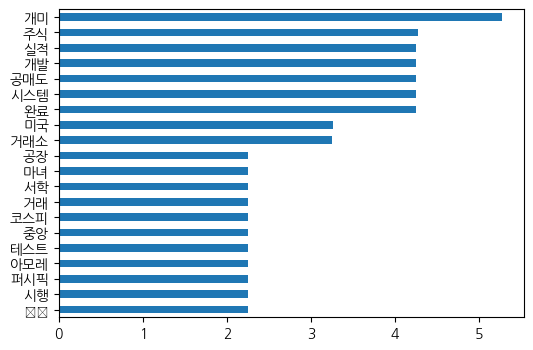

In [81]:
# 첫번재 주제와 연관성이 있는 상위 30개 단어 - 시각화(bar)
df_cvect_lda_topic.loc[0].nlargest(20).sort_values(ascending=True).plot.barh(figsize=(6,4))

In [84]:
# 주제별로 상위 키워드를 막대그래프로 시각화합니다.
# model - LDA 모델
# feature_names - 단어
# n_top_words, - 주제와 연관된 상위단어 n위까지
# title, - 그래프 제목
# n_topics=5 - 주제 수
def plot_top_words(model, feature_names, n_top_words, title, n_topics=5):    
    
    df_topic = pd.DataFrame(model.components_, columns=feature_names)
    
    fig, axes = plt.subplots(1, n_topics, figsize=(6 * n_topics, 15), sharex=True)
    axes = axes.flatten()

    for topic_idx in df_topic.index:
        ax = axes[topic_idx]
        df_topic.loc[topic_idx].nlargest(n_top_words).plot.barh(ax=ax)
        ax.invert_yaxis()
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 20})
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right".split():
            ax.spines[i].set_visible(False)

        fig.suptitle(title, fontsize=30)
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

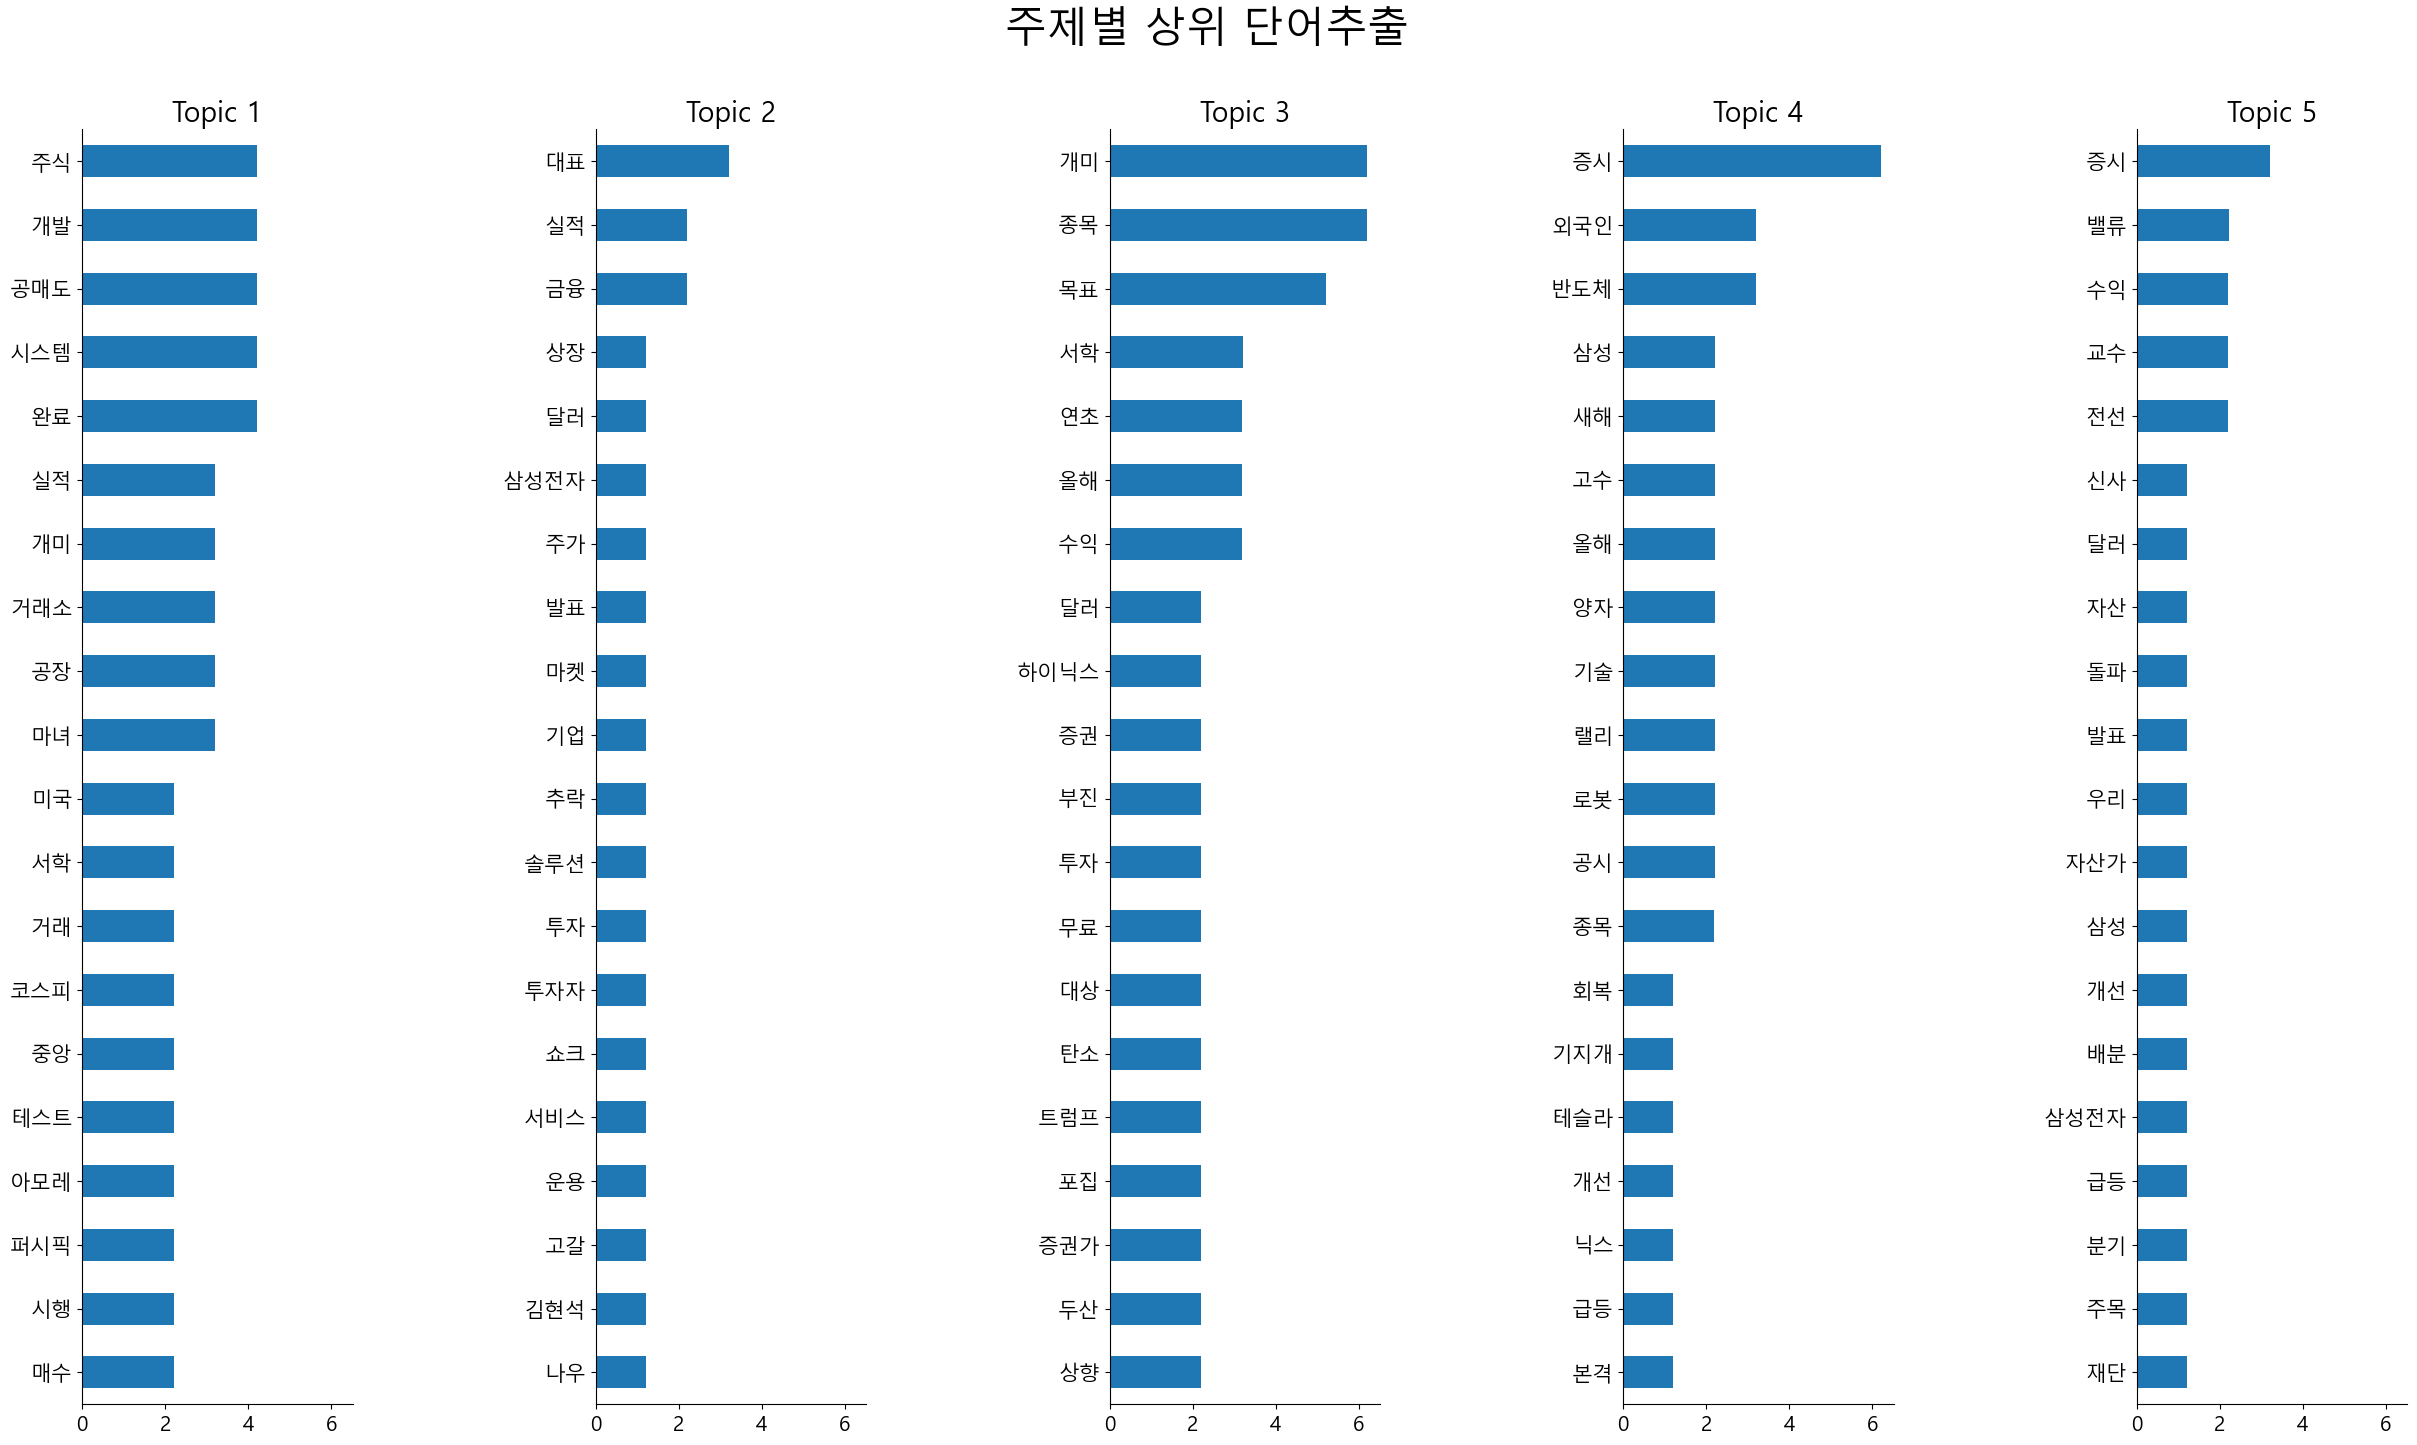

In [97]:
plot_top_words(LDA_model, cvect.get_feature_names_out(), 20, '주제별 상위 단어추출', n_components)